# Dimentionality Reduction

Dimensionality reduction is a technique used in machine learning and statistics to reduce the number of random variables (features) under consideration by obtaining a set of principal variables. Essentially, it's about finding a way to represent your data using fewer columns or dimensions, while still retaining as much of the important information as possible.

Why do we do it?

* Curse of Dimensionality: In very high-dimensional spaces (many features), data becomes extremely sparse, and distances between points become less meaningful. This makes it harder for machine learning algorithms to find patterns.
* Computational Efficiency: Training models with hundreds or thousands of features can be very slow and require a lot of memory. Reducing dimensions speeds up computation.
* Noise Reduction: Irrelevant or redundant features can introduce noise into the data, making it harder for models to learn. Dimensionality reduction can help filter this out.
* Improved Model Performance: Simpler models (with fewer features) are often less prone to overfitting and can generalize better to new, unseen data.
Visualization: It's impossible to visualize data in more than three dimensions. Reducing data to 2 or 3 dimensions allows for easy plotting and understanding of underlying structures.

# T-SNE

What is t-SNE (t-Distributed Stochastic Neighbor Embedding)?

t-SNE is a non-linear dimensionality reduction technique that is primarily used for visualizing high-dimensional datasets in 2 or 3 dimensions. Its main goal is to embed high-dimensional data into a lower-dimensional space (typically a 2D scatter plot) in such a way that similar data points in the high dimension are mapped to nearby points in the low dimension, and dissimilar data points are mapped to distant points.

Unlike PCA, which focuses on preserving global variance, t-SNE prioritizes preserving the local structure of the data, meaning it's excellent at revealing clusters and subgroups that might be hidden in complex, high-dimensional data.

The "High-Dimensional Ball of Yarn" Example:

Imagine you have a giant, tangled ball of yarn with different colored strands:

* Red strands: Represent news articles about "Politics."
* Blue strands: Represent news articles about "Sports."
* Green strands: Represent news articles about "Technology."
* Yellow strands: Represent news articles about "Entertainment."

This ball of yarn is your high-dimensional data. Each strand is an "article" (a data point), and its color (topic) is determined by many hidden features (e.g., word frequencies, semantic embeddings in a 1000-dimensional space). Inside the ball, strands of the same color are naturally tangled together, but it's hard to see these distinct color clusters because everything is interwoven.

What t-SNE Does:

t-SNE's job is like carefully unraveling this ball of yarn and laying it out on a flat table (your 2D plot) in a way that:

* Keeps similar colors together: All the red strands that were tangled together in the ball stay close to each other on the table, forming a red cluster. The same happens for blue, green, and yellow strands.
* Pushes different colors apart: The red cluster will be clearly separated from the blue, green, and yellow clusters on the table.
* Reveals Sub-clusters: Maybe within the "Red (Politics)" cluster, there's a slightly darker red sub-cluster representing "election news" and a lighter red sub-cluster for "economic policy news." t-SNE tries to maintain these smaller, local groupings as well.

How it achieves this (conceptually, simplified):

* Step 1: High-Dimensional Neighbors: t-SNE first looks at every single strand in the tangled ball. For each strand, it figures out its "neighbors" – which other strands are very close to it in the tangled mess. It calculates the probability that any two strands are neighbors based on their actual high-dimensional distance.
* Step 2: Low-Dimensional Map (The Table): It then creates a random arrangement of these same strands on your flat table (2D plot).
* Step 3: Matching Probabilities: Now, it repeatedly adjusts the positions of the strands on the table. For every pair of strands, it tries to make the probability of them being "neighbors" on the table as close as possible to their probability of being "neighbors" in the original tangled ball.
* If two red strands were very close in the ball, t-SNE "pulls" them closer together on the table.
* If a red strand and a blue strand were far apart in the ball, t-SNE "pushes" them further apart on the table.
* The "t-Distributed" Part: It uses a "Student's t-distribution" to model similarities in the low-dimensional space. This distribution has "heavier tails," which helps t-SNE avoid crowding points too much and creates more distinct, separated clusters.

The Result (Your Plot):

The output of t-SNE is a scatter plot where:

* Each dot represents an article (a data point).
* Dots of the same conceptual "color" (topic) will typically form visually distinct clusters.
* The distance between clusters on the plot roughly reflects how different those topics are.

This allows you to take incredibly complex data (like articles described by thousands of words) and visually understand its underlying structure, identify hidden clusters, and confirm hypotheses about your data's organization in a way that would be impossible by looking at raw numbers.

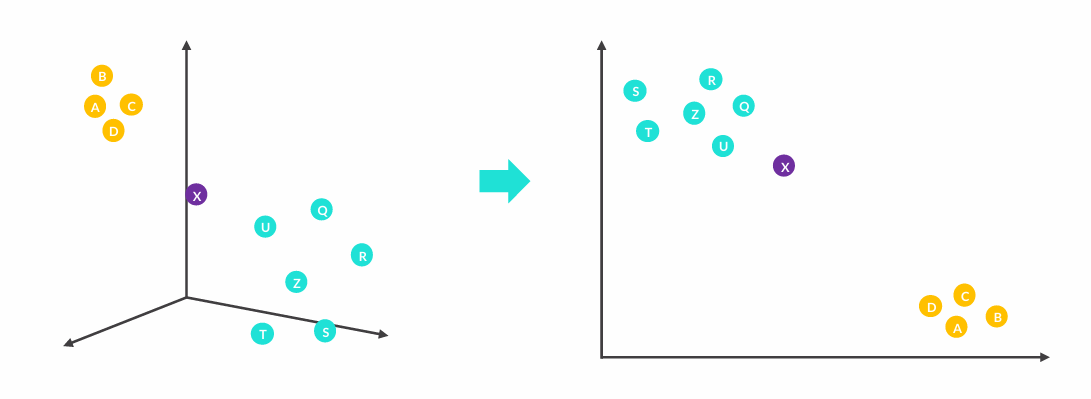

# Notebook Structure

1. Import necessary dependencies
2. Import the dataset and perform initial analysis
3. Data preprocessing and cleaning
4. Implement the t-sne model with 2 components
5. Visualize the t-sne components in a scatter plot

# 1. Import necessary dependencies

In [16]:
#Import necessary libraries

import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# 2. Import the dataset and perform initial analysis

In [2]:
# read in entertainment data

df = pd.read_csv('entertainment.csv')

In [3]:
df.head()

,name,books,tv_shows,video_games
0,Aaliyah,0.5,4.6,4.9
1,Abigail,0.0,4.5,4.8
2,Addison,0.5,4.5,5.0
3,Adeline,3.5,4.5,6.6
4,Alana,2.8,3.8,5.6


In [4]:
df.shape

(150, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         150 non-null    object 
 1   books        150 non-null    float64
 2   tv_shows     150 non-null    float64
 3   video_games  150 non-null    float64
dtypes: float64(3), object(1)
memory usage: 4.8+ KB


In [6]:
df.describe()

,books,tv_shows,video_games
count,150.000000,150.000000,150.000000
mean,2.993333,4.586000,5.843333
std,1.917761,0.645587,0.828066
min,0.000000,3.000000,4.300000
25%,0.800000,4.200000,5.100000
50%,3.200000,4.500000,5.800000
75%,4.500000,4.900000,6.400000
max,6.200000,6.600000,7.900000


# 3. Data preprocessing and cleaning

### A. Feature selection ( remove the id column)

In [7]:
# remove the id column

data = df.iloc[:, 1:]
data.head()

,books,tv_shows,video_games
0,0.5,4.6,4.9
1,0.0,4.5,4.8
2,0.5,4.5,5.0
3,3.5,4.5,6.6
4,2.8,3.8,5.6


### B. Checking for missing values

In [8]:
data.isnull().sum()

,0
books,0
tv_shows,0
video_games,0


### C. Feature Scaling

In [9]:
# Standardize the remaining columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler_ft = scaler.fit_transform(data)
data_scaled = pd.DataFrame(scaler_ft, columns=data.columns)
data_scaled.head()

,books,tv_shows,video_games
0,-1.304483,0.021758,-1.143017
1,-1.566077,-0.133658,-1.264185
2,-1.304483,-0.133658,-1.021849
3,0.265082,-0.133658,0.916837
4,-0.101150,-1.221575,-0.294842


# 4. Implement the t-sne model with 2 components

### A. Build a t-sne model with 2 components

In [10]:
# import tsne from sklearn

from sklearn.manifold import TSNE

In [11]:
# create a tsne object

tsne = TSNE(n_components=2, random_state=42)

### B. Transform the data into low dimentional space ( 2 dimentions )

In [12]:
# fit a model and transform the data into a lower dimensionality space

data_tsne = tsne.fit_transform(data)

In [18]:
data.columns

Index(['books', 'tv_shows', 'video_games'], dtype='object')

In [14]:
# Convert the array into Dataframe

df_tsne = pd.DataFrame(data_tsne, columns=['component 1','component 2'])
df_tsne

,component 1,component 2
0,-22.600838,7.176497
1,-23.435167,6.409766
2,-22.572191,6.835178
3,9.264651,-0.698507
4,13.751351,1.153773
...,...,...
145,5.409168,-6.856253
146,3.935719,-7.493999
147,5.033703,-9.265713
148,-19.336304,10.674837


### Interpretation of the transformed dataframe

* component 1 and component 2 columns: These represent the two new, lower-dimensional features (or components) that t-SNE has created from your original higher-dimensional data. These components are abstract; their numerical values don't directly correspond to any single original feature like 'books', 'tv_shows', or 'video_games'.
* Rows (0 to 149): Each row in this DataFrame corresponds to an individual data point from your original data. Since the DataFrame shows 150 rows, it means your original data had 150 entries (likely 150 customers, based on your previous "Customer Preferences" context).
* Values: The numbers in component 1 and component 2 are the transformed coordinates of each original data point in the new 2-dimensional space. These coordinates are what you would plot on a scatter plot to visualize the relationships between your customers based on their preferences.
* Purpose: The purpose of this df_tsne DataFrame is to provide the coordinates for plotting your customer preference data in a 2D space. When plotted, customers with similar preferences (e.g., those who like 'books' and 'video_games' a lot, or 'tv_shows' a lot) will appear close together, forming clusters. Customers with very different preference profiles will appear further apart on the plot.

# 5. Visualize the t-sne components in a scatter plot

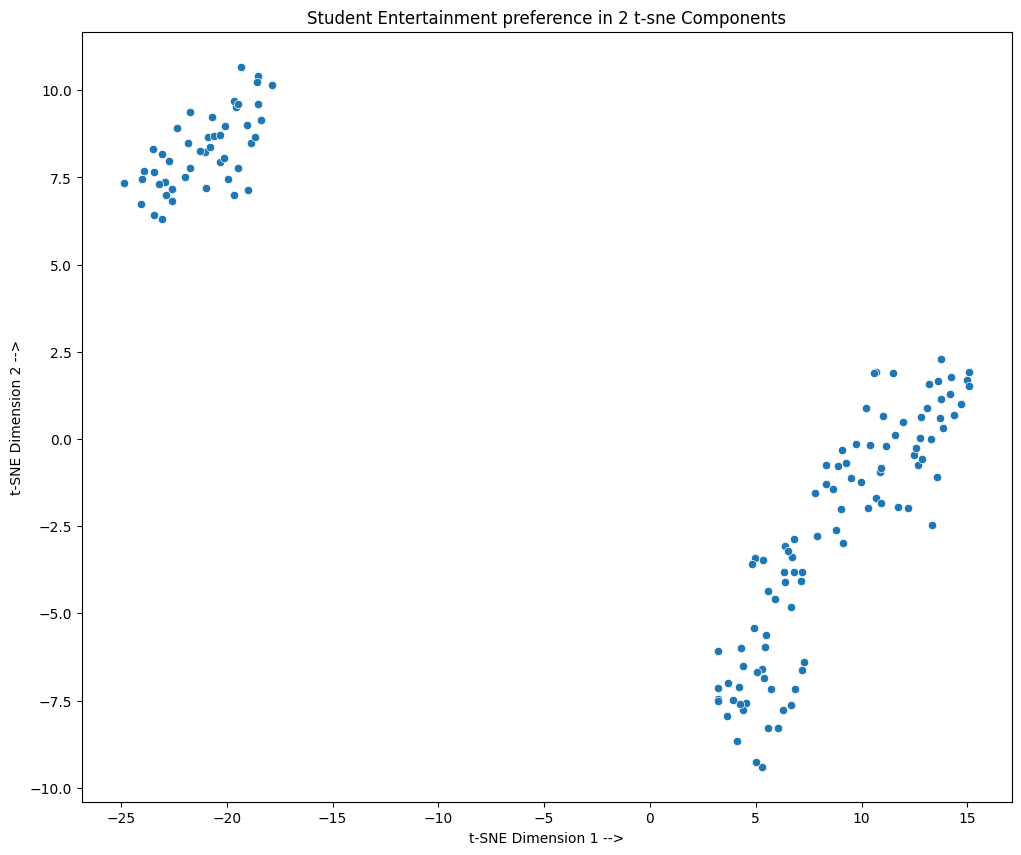

In [19]:

import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axes with a specified size
plt.figure(figsize=(12, 10)) # Adjust width and height as desired

sns.scatterplot(x='component 1', y='component 2', data=df_tsne)
plt.xlabel('t-SNE Dimension 1 -->')
plt.ylabel('t-SNE Dimension 2 -->') # PC2 is mostly positive with Band & PhysEd, so higher means better.

plt.title('Student Entertainment preference in 2 t-sne Components')
plt.show()

# Completed